# Support dashboard

## Oppgave a)

In [12]:
# Lese inn nødevendige biblioteker

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Lese inn filen  support _uke_24.xlsx

data = pd.read_excel("support_uke_24.xlsx")

# Lagre data i arrays
u_dag = data['Ukedag'].values
kl_slett =data ['Klokkeslett'].values
varighet =data['Varighet'].values
score = data['Tilfredshet'].values

# Skriv ut arrays
print("u_dag:", u_dag)
print("kl_slett:", kl_slett)
print("varighet:", varighet)
print("score:", score)

u_dag: ['Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag' 'Mandag'
 'Mandag' 'Mandag' 'Mandag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag'
 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Tirsdag' 'Onsdag' 'Onsdag'
 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag' 'Onsdag'

# Oppgave b)

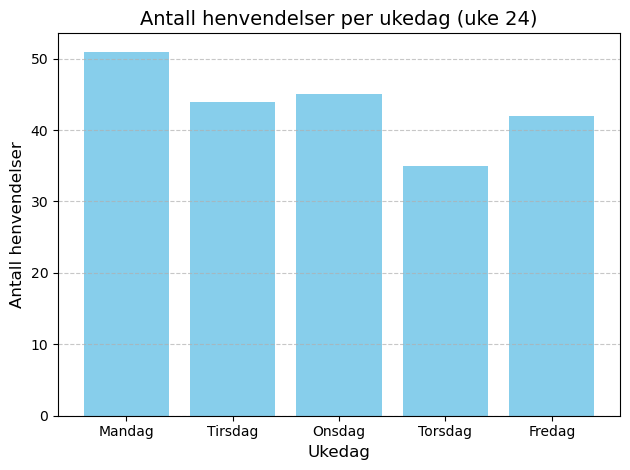

In [14]:
# Hente ukedager fra kolonnen 'Ukedag'
u_dag = data['Ukedag'].values

# Liste over de fem ukedagene
ukedager = ['Mandag', 'Tirsdag', 'Onsdag', 'Torsdag', 'Fredag']

# Initialisere en liste for telling

henvendelser = [0] * len(ukedager)

# While-løkke for å telle antall forekomster av hver ukedag
i = 0
while i < len(u_dag):
    dag = u_dag[i]
    if dag in ukedager:
        index = ukedager.index(dag)
        henvendelser[index] += 1
    i += 1

# Lage søylediagram med resultatene
plt.bar(ukedager, henvendelser, color='skyblue')
plt.title('Antall henvendelser per ukedag (uke 24)', fontsize=14)
plt.xlabel('Ukedag', fontsize=12)
plt.ylabel('Antall henvendelser', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Vise diagrammet
plt.tight_layout()
plt.show()

## Oppgave c)

In [16]:

# Hente ut kolonnen for samtaletid ("Varighet")
varighet = data['Varighet'].values

# Konvertere tiden til minutter og sekunder
def tid_til_minutter_sekunder(tid):
    timer, minutter, sekunder = map(int, tid.split(':'))
    total_minutter = timer * 60 + minutter
    return total_minutter, sekunder

# Finne minste og lengste samtaletid i formatet minutter og sekunder
korteste_tid = min(varighet, key=lambda x: int(x.split(':')[1]) * 60 + int(x.split(':')[2]))
lengste_tid = max(varighet, key=lambda x: int(x.split(':')[1]) * 60 + int(x.split(':')[2]))

korteste_minutter, korteste_sekunder = tid_til_minutter_sekunder(korteste_tid)
lengste_minutter, lengste_sekunder = tid_til_minutter_sekunder(lengste_tid)

# Skrive resultatet til skjerm
print(f"Minste samtaletid som er loggført for uke 24 er {korteste_minutter} minutter og {korteste_sekunder} sekunder.")
print(f"Lengste samtaletid som er loggført for uke 24 er {lengste_minutter} minutter og {lengste_sekunder} sekunder.")


Minste samtaletid som er loggført for uke 24 er 0 minutter og 59 sekunder.
Lengste samtaletid som er loggført for uke 24 er 11 minutter og 28 sekunder.


## Oppgave d)

In [18]:

# Hente ut kolonnen 'Varighet'
tid_data = data['Varighet'].values

# Funksjon for å konvertere tid fra 'hh:mm:ss' til desimal (minutter.sekunder)
def konverter_tid(tid):
    try:
        timer, minutter, sekunder = map(int, tid.split(':'))
        return minutter + sekunder / 60
    except ValueError:  # Håndtere ugyldige verdier
        return None

# Konvertere alle tidspunkter til desimalt format
tid_minutter = [konverter_tid(tid) for tid in tid_data]

# Fjerne None-verdier (ugyldig data)
tid_minutter = [tid for tid in tid_minutter if tid is not None]

# Kontrollere om det er gyldige verdier igjen
if not tid_minutter:
    print("\nIngen gyldige verdier funnet for samtaletid. Kontrollér Excel-filen.")
else:
    # Beregne gjennomsnittlig tid
    gjennomsnitt_tid = sum(tid_minutter) / len(tid_minutter)
    print(f"\nGjennomsnittlig samtaletid for uke 24 er {gjennomsnitt_tid:.2f} minutter.")



Gjennomsnittlig samtaletid for uke 24 er 6.67 minutter.


## Oppgave e)

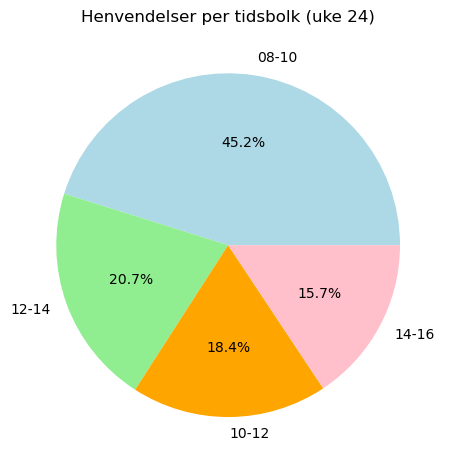

In [20]:

# Lese inn Excel-filen
data = pd.read_excel("support_uke_24.xlsx")

# Konvertere kolonnen 'Klokkeslett' til datetime-format
data['Klokkeslett'] = pd.to_datetime(data['Klokkeslett'], format='%H:%M:%S', errors='coerce')

# Funksjon for å finne tidsbolk
def finn_tidsbolk(tid):
    if pd.isna(tid):  # Håndtere manglende eller ugyldige verdier
        return None
    if 8 <= tid.hour < 10:
        return '08-10'
    elif 10 <= tid.hour < 12:
        return '10-12'
    elif 12 <= tid.hour < 14:
        return '12-14'
    elif 14 <= tid.hour < 16:
        return '14-16'
    else:
        return None

# Bruke funksjonen for å tilordne tidsbolk for hvert klokkeslett
tidsbolker = [finn_tidsbolk(tid) for tid in data['Klokkeslett']]

# Tell antall henvendelser for hver tidsbolk
tidsbolk_telling = pd.Series(tidsbolker).value_counts()

# Visualisere resultatet som et sektordiagram (kakediagram)
tidsbolk_telling.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'orange', 'pink'])
plt.title('Henvendelser per tidsbolk (uke 24)')
plt.ylabel('')  # Skjuler standard 'frekvens'-etikett
plt.tight_layout()
plt.show()




## Oppgave f)

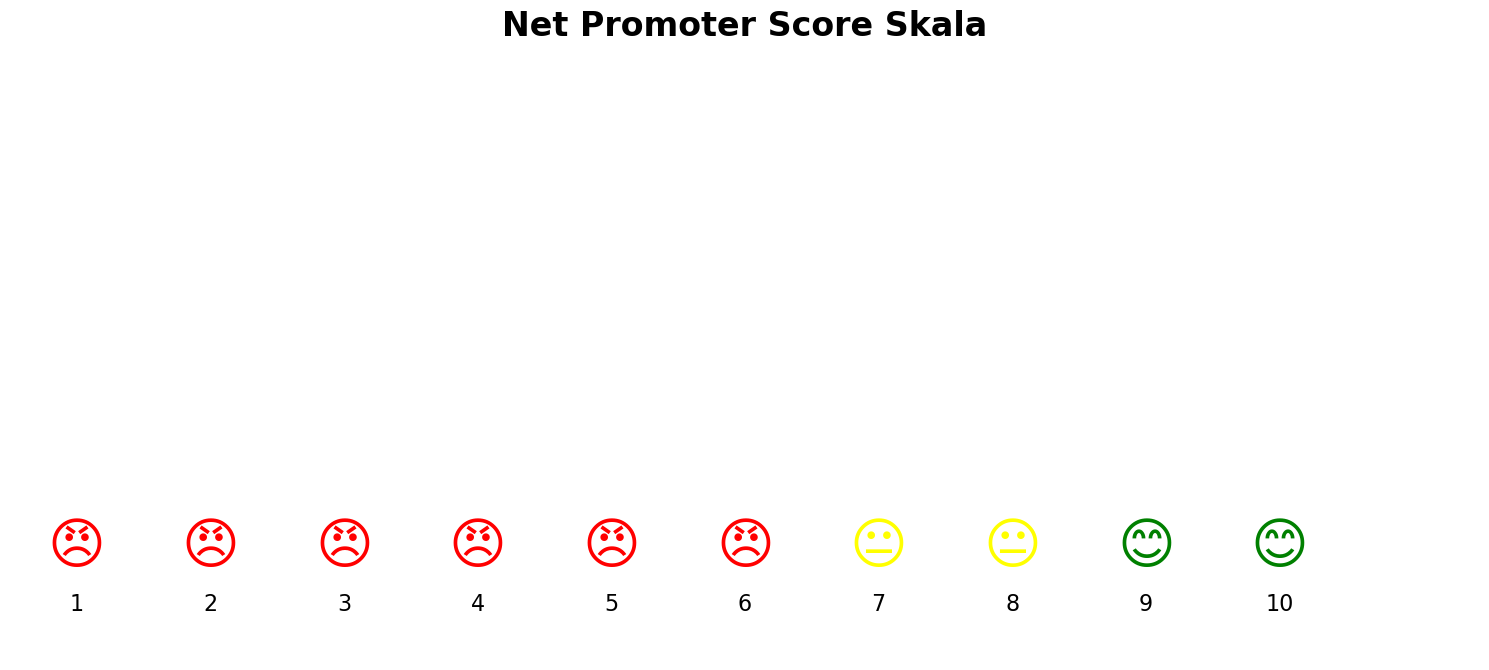

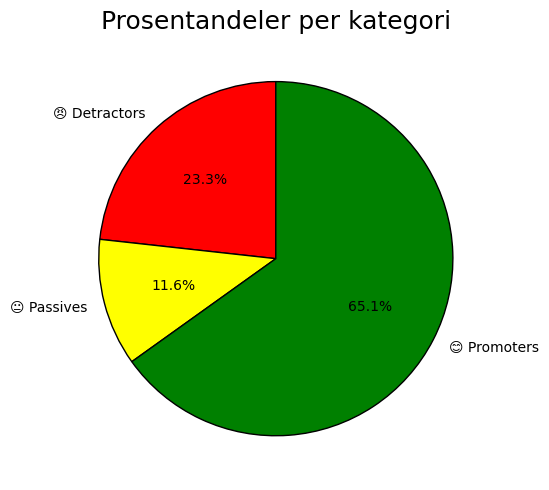

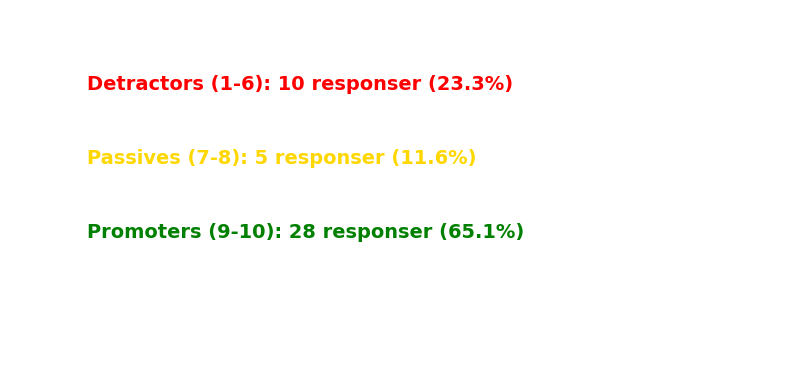

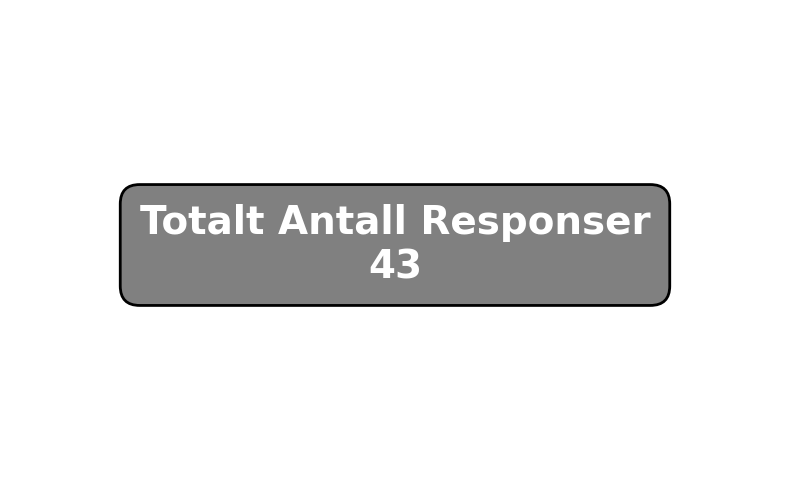

In [22]:


# Hente ut kolonnen 'Tilfredshet' og fjerne NaN-verdier
tilfredshet = data['Tilfredshet'].dropna()

# Beregne antall responser for hver score
score_counts = tilfredshet.value_counts().sort_index()

# Beregne prosentandeler for kategoriene
prosent_negative = (score_counts.loc[1:6].sum() / len(tilfredshet)) * 100 if 1 in score_counts.index else 0
prosent_noytrale = (score_counts.loc[7:8].sum() / len(tilfredshet)) * 100 if 7 in score_counts.index else 0
prosent_positive = (score_counts.loc[9:10].sum() / len(tilfredshet)) * 100 if 9 in score_counts.index else 0

# Totalt antall responser
total_responser = len(tilfredshet)

# 1. Net Promoter Score Skala
fig, ax = plt.subplots(figsize=(15, 7))  # Justert høyde for mellomrom
plt.suptitle("Net Promoter Score Skala", fontsize=24, weight='bold', y=0.95)  # Overskrift helt øverst

farger = ['red'] * 6 + ['yellow'] * 2 + ['green'] * 2  # Farger for score 1-10
ansikter = ['😠'] * 6 + ['😐'] * 2 + ['😊'] * 2        # Ansikter for score 1-10

for i, score in enumerate(range(1, 11)):  # Score fra 1 til 10
    respons_count = score_counts.get(score, 0)  # Antall responser for denne scoren
    ax.text(i, 2, ansikter[i], fontsize=40, ha='center', va='center', color=farger[i])  # Ansikter
    ax.text(i, 1, str(score), fontsize=16, ha='center', va='center', color='black')  # Tallene rett under ansiktene

ax.set_xlim(-0.5, 10.5)
ax.axis('off')

plt.tight_layout()
plt.show()

# 2. Kakediagram med prosentandeler
fig, ax = plt.subplots(figsize=(8, 5))
ansikter = ['😠 Detractors', '😐 Passives', '😊 Promoters']
verdier = [prosent_negative, prosent_noytrale, prosent_positive]
farger = ['red', 'yellow', 'green']

ax.pie(verdier, labels=ansikter, autopct='%1.1f%%', colors=farger, startangle=90, wedgeprops={'edgecolor': 'black'})
ax.set_title('Prosentandeler per kategori', fontsize=18)
plt.tight_layout()
plt.show()

# 3. Linjer med detaljer for hver kategori
fig, ax = plt.subplots(figsize=(8, 4))
ax.text(0.1, 0.8, f"Detractors (1-6): {score_counts.loc[1:6].sum()} responser ({prosent_negative:.1f}%)",
        fontsize=14, color='red', weight='bold', va='center')
ax.text(0.1, 0.6, f"Passives (7-8): {score_counts.loc[7:8].sum()} responser ({prosent_noytrale:.1f}%)",
        fontsize=14, color='gold', weight='bold', va='center')
ax.text(0.1, 0.4, f"Promoters (9-10): {score_counts.loc[9:10].sum()} responser ({prosent_positive:.1f}%)",
        fontsize=14, color='green', weight='bold', va='center')
ax.axis('off')

plt.tight_layout()
plt.show()

# 4. Totalt antall responser i grå boks med tekst
fig, ax = plt.subplots(figsize=(8, 5))
bbox_props = dict(boxstyle="round,pad=0.5", edgecolor="black", facecolor="gray", lw=2)

ax.text(0.5, 0.5, f"Totalt Antall Responser\n{total_responser}",
        fontsize=28, color='white', weight='bold', ha='center', va='center', bbox=bbox_props)

ax.axis('off')

plt.tight_layout()
plt.show()
